In [9]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit_textbook.tools import array_to_latex

In [10]:
# creating the circuit

circuit = QuantumCircuit(4,2)

In [3]:
# designing half adder

circuit.x(0)
# circuit.x(1)
circuit.barrier()
circuit.cx(0,2)
circuit.cx(1,2)
circuit.ccx(0,1,3)
circuit.barrier()

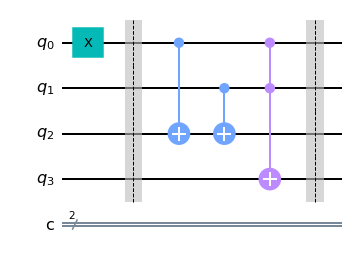

In [4]:
# draw the circuit

%matplotlib inline
circuit.draw(output='mpl')

The state-vector representation : 


<IPython.core.display.Math object>


The bloch sphere representation : 


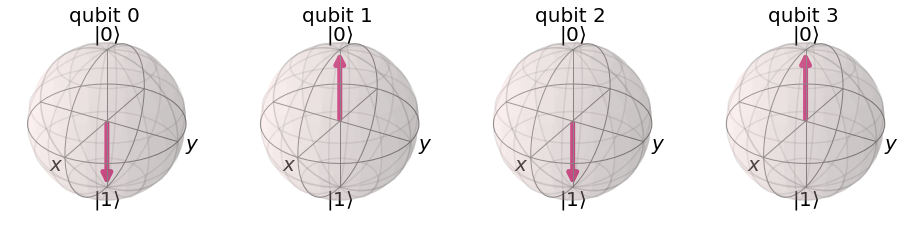

In [16]:
# for state vector visualization & bloch sphere visualization

statevector_simulator= Aer.get_backend('statevector_simulator')
jobs= execute(circuit,backend=statevector_simulator)
state_vector= jobs.result().get_statevector()
print('The state-vector representation : ')
array_to_latex(state_vector, pretext="\\text{Statevector} = ")
print()
print('The bloch sphere representation : ')
plot_bloch_multivector(state_vector)

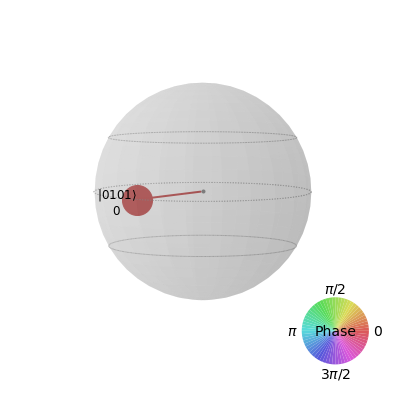

In [17]:
#  plotting in q_sphere 

plot_state_qsphere(state_vector,show_state_phases = True)

In [18]:
#  measure the qubit 2 & 3
circuit.measure(2,0)
circuit.measure(3,1)

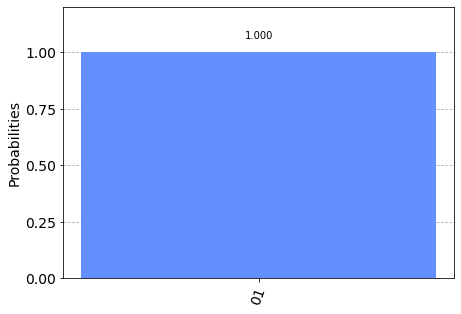

In [19]:
# show the result of qasm_simulator result

backend= Aer.get_backend('qasm_simulator')
result= execute(circuit,backend=backend,shots=1024).result()
count= result.get_counts()
plot_histogram(count)